In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
cd Downloads

C:\Users\Admin\Downloads


In [6]:
train_data = pd.read_csv("train_data.csv")

In [7]:
bookings = pd.read_csv("bookings.csv")
bookings_data = pd.read_csv("bookings_data.csv")
customer_data = pd.read_csv("customer_data.csv")
hotels_data = pd.read_csv("hotels_data.csv")
payments_data = pd.read_csv("payments_data.csv")

In [8]:
bookings.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date
0,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13
1,c7dce0b6741e215027345153cdb2fc8b,7a6c6d20dea0b8c802d7efb0830fb474,completed,2008-07-26 20:24:37,2008-07-28 03:07:27,2008-08-09 15:10:45
2,d0c44946d9cf07ec65d47770eb9100c2,bf3443c3d931a36708941ce2a54c0b03,completed,2008-08-10 08:21:49,2008-08-10 08:38:23,2008-08-19 17:49:29
3,e918fe9c16f97b45f8a949d5b44dbf5d,20adcdbec7375364d82f88197465ea79,completed,2007-11-21 19:11:06,2007-11-21 19:28:59,2007-12-05 00:11:42
4,e6cb83a9ceb5573f8159ad21c59c0840,ea8866dbdbc4fb7aad2c8ab97904e6da,completed,2008-02-16 21:01:39,2008-02-16 22:03:29,2008-02-19 18:00:02


In [9]:
bookings_data.head()

,booking_id,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,price,agent_fees
0,242fe8c5a6d1ba2dd792cb1621400010,1,e7ecb4970a6e2683c13e614244733e06,8ac8b2bce089ec2a04120248436dade1,2017-09-19 09:45:35,58.90,13.29
1,f77f2f0320c557190d7a144bdd300018,1,2189ee658865ca93d83a8fe5f2d52b80,b6c2c614352b383efe2d36dd7ddc04e1,2017-05-03 11:05:13,239.90,19.93
2,98224ef6ca0657da4fc703e000229ec3,1,b67abbeef9df44fd0fdc777355d18b72,2adc84c38acab88f23d5b51032eddd24,2018-01-18 14:48:30,199.00,17.87
3,cdf0a6daa1e931b038114c7500024acb,1,0f1595efa32f14722fc7634da152a461,409006425275ba1c2b49d7a1d34a5052,2018-08-15 10:10:18,12.99,12.79
4,26cf59d7ce69dfabb4e55b4fd900042b,1,30de03045865e4e10089ac6c3623068f,1e74553ab94004ba5c87df560393f3a5,2017-02-13 13:57:51,199.90,18.14


In [10]:
customer_data.head()

,customer_id,customer_unique_id,country
0,1fbc88172c00ba8bc706b8999e2fba1a,a542e4b93843c6dd7febb0861eff4711,Portugal
1,e83d337fd6b2def6b18a428ac7718955,9b7ac935b93aa66c333dc3290c77bc52,Japan
2,586ebd08712fdd0374a034e7b3e00288,8181a18229c7b0b2b5e060e732b5b29e,Portugal
3,c5c5109e529d4dc6358b12c3b2b6027b,24d7702b9acbbff3f3c259dac757896d,USA
4,1c80ec8364f7c12e35b23ad4f2d8ab17,18a9036ed96c73b8d066345ecd01c38d,Slovakia


In [11]:
hotels_data.head()

,hotel_id,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,4dbcff4541ed26657ea517e51e9e8ef0,65.0,40.0,287.0,1.0
1,1139cb16b67ca9e5dea641aaa2f3aa07,72.0,44.0,276.0,1.0
2,c8810374ed1b65e291975717f96bd76e,69.0,46.0,250.0,1.0
3,66a932b7673e239eb23dcef67bcfe190,18.0,27.0,261.0,1.0
4,74444849c219cff195d0b719dc1a7de2,11.0,37.0,402.0,4.0


In [12]:
payments_data.head()

,booking_id,payment_sequential,payment_type,payment_installments,payment_value
0,6f3fe1789b1e8b2acac839d17b81ef22,1,credit_card,8,99.33
1,917af2d9aefd1278f1dcfa0a9810da82,1,credit_card,1,24.39
2,396b6fa0d3dd708e76c1bd25e8ea4e93,1,credit_card,1,65.71
3,dc1373bb41e913ab953ba78997921bbc,1,credit_card,8,107.78
4,a16b47b59251dd489d4441a42fdf880b,1,credit_card,2,128.45


In [13]:
df = pd.merge(bookings, bookings_data, on="booking_id")
df2 = pd.merge(df,payments_data,on = 'booking_id')
df_final = pd.merge(df2,hotels_data,on= "hotel_id")
df_final.shape

(117601, 20)

In [14]:
df_final.shape
df_final.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,price,agent_fees,payment_sequential,payment_type,payment_installments,payment_value,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,11.0,40.0,268.0,4.0
1,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,11.0,40.0,268.0,4.0
2,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,11.0,40.0,268.0,4.0
3,d95713541c87cd1a2e48201934128e10,05f23924cd00833fd87daa0831a20e81,completed,2007-08-18 18:12:31,2007-08-18 19:48:16,2007-08-21 14:27:43,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,11.0,40.0,268.0,4.0
4,2de2bad69267ecfbcf0e7e841ddf8f8f,912a51b924fbd34d3426c7ac168e1433,completed,2007-08-05 18:07:47,2007-08-05 18:26:15,2007-08-10 18:13:01,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,11.0,40.0,268.0,4.0


In [15]:
df_final= pd.merge(df_final,train_data,on = "booking_id")


In [16]:
df_final.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,...,agent_fees,payment_sequential,payment_type,payment_installments,payment_value,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty,rating_score
0,d95713541c87cd1a2e48201934128e10,05f23924cd00833fd87daa0831a20e81,completed,2007-08-18 18:12:31,2007-08-18 19:48:16,2007-08-21 14:27:43,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-08-21 20:05:16,...,7.78,1,credit_card,3,37.77,11.0,40.0,268.0,4.0,4
1,2de2bad69267ecfbcf0e7e841ddf8f8f,912a51b924fbd34d3426c7ac168e1433,completed,2007-08-05 18:07:47,2007-08-05 18:26:15,2007-08-10 18:13:01,1,72647811a353c7ac498a87285b348845,b71d7fa48d967e0e4c94d59d93504c0c,2017-08-08 18:37:31,...,7.78,1,credit_card,1,37.77,11.0,40.0,268.0,4.0,5
2,2b59b3e5113a59a905b340c5e18f7d11,ee17d1cd09523f484d1367407057a7d5,completed,2008-06-13 10:08:52,2008-06-13 10:41:32,2008-06-21 00:14:13,1,a385ac33a80bd5114aec74eb8595fac2,9169ac090589d85746e3e036fef0ace0,2018-06-15 10:58:32,...,8.78,1,credit_card,3,128.68,65.0,29.0,178.0,1.0,5
3,caee19790309333210917b2c7d86674c,93f35549b5e480b9a3d7bbf3cd1b3382,completed,2008-08-11 11:20:35,2008-08-11 14:18:19,2008-08-16 18:34:47,1,a385ac33a80bd5114aec74eb8595fac2,e7f891c38608bf9e0962289cdb325fb7,2018-08-13 14:31:29,...,18.92,1,credit_card,5,135.82,65.0,29.0,178.0,1.0,5
4,dd809c249ed98ab6b754f913d229653f,247b6bc0931771885eafe1365d7b227b,completed,2008-05-02 02:01:32,2008-05-02 02:43:14,2008-05-10 17:36:51,1,a385ac33a80bd5114aec74eb8595fac2,9169ac090589d85746e3e036fef0ace0,2018-05-07 02:31:13,...,17.55,1,credit_card,4,137.45,65.0,29.0,178.0,1.0,5


In [17]:
df_final.isnull().sum()

booking_id                          0
customer_id                         0
booking_status                      0
booking_create_timestamp            0
booking_approved_at                 6
booking_checkin_customer_date    1279
booking_sequence_id                 0
hotel_id                            0
seller_agent_id                     0
booking_expiry_date                 0
price                               0
agent_fees                          0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
hotel_category                    829
hotel_name_length                 829
hotel_description_length          829
hotel_photos_qty                  829
rating_score                        0
dtype: int64

In [18]:
df_final = df_final.dropna(axis=0)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_final["payment_type"].astype(str))
df_final["payment_type"]=le.transform(df_final["payment_type"].astype(str))
le.fit(df_final["booking_status"].astype(str))
df_final["booking_status"]=le.transform(df_final["booking_status"].astype(str))

In [20]:
df_final.shape

(57157, 21)

In [21]:
df_final["booking_approved_at"]= pd.to_datetime(df_final["booking_approved_at"])
df_final["booking_create_timestamp"]= pd.to_datetime(df_final["booking_create_timestamp"])
df_final["booking_checkin_customer_date"] = pd.to_datetime(df_final["booking_checkin_customer_date"])

x = (df_final.booking_approved_at-df_final.booking_create_timestamp).dt.total_seconds() %60
y = (df_final.booking_checkin_customer_date-df_final.booking_create_timestamp).dt.total_seconds() %60
z = (df_final.booking_checkin_customer_date-df_final.booking_approved_at).dt.total_seconds() %60
df_final["approval_time"] = x
df_final["total_time"] = y
df_final["time_gap"] = z

<AxesSubplot:xlabel='rating_score', ylabel='count'>

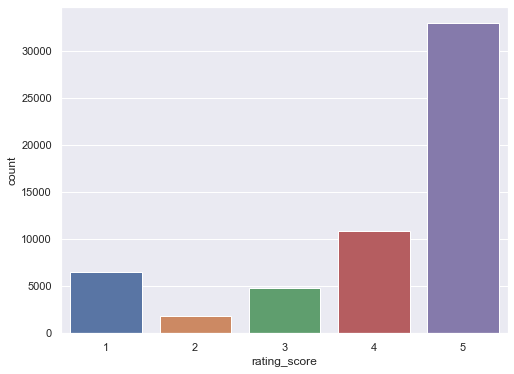

In [22]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="rating_score",data=df_final)

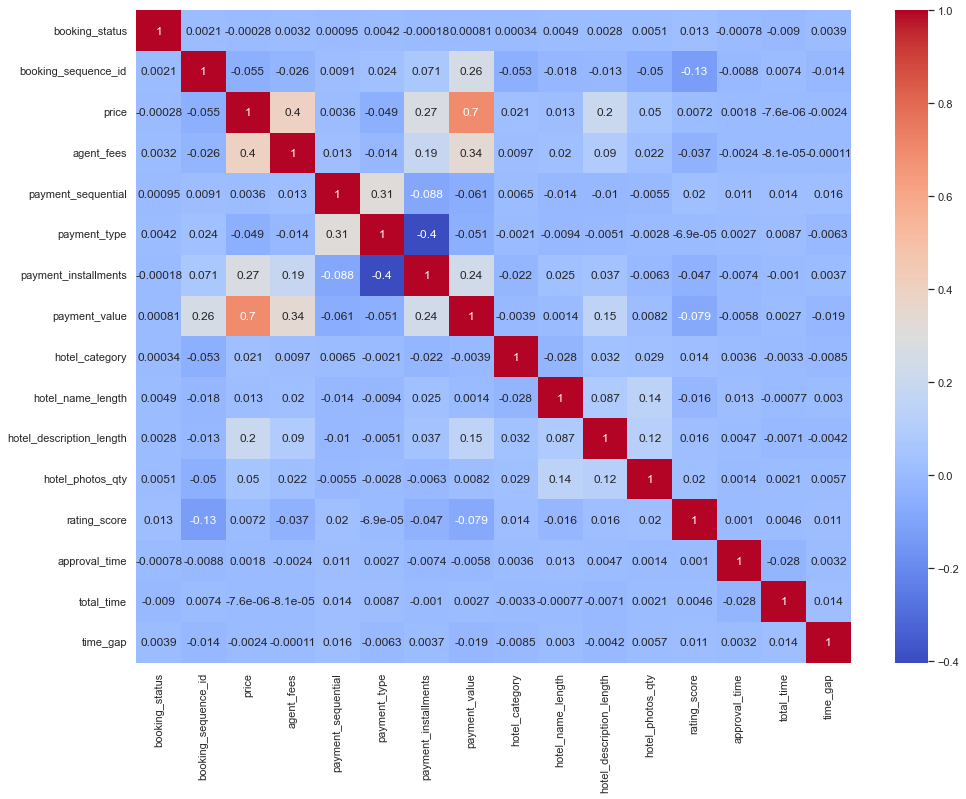

In [23]:
sns.set(rc={'figure.figsize':(16,12)})
plot=sns.heatmap(df_final.corr(),annot=True,cmap="coolwarm")

In [24]:
X=df_final[["price","agent_fees","payment_installments","booking_status","payment_type","payment_value","hotel_name_length","hotel_description_length","hotel_photos_qty","approval_time","total_time","time_gap"]].values
Y=df_final["rating_score"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [25]:
rfc = RandomForestClassifier(n_estimators=250)

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

In [26]:
 #random forest
accuracy_score(Y_test,y_pred)

0.6595521343596921

In [27]:

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [28]:
y_pred=clf.predict(X_test)

In [29]:
#lightgbm
accuracy_score(Y_test,y_pred) 

0.6087590389549802

In [31]:
from xgboost import XGBClassifier

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Y_train)

In [33]:
xgb = XGBClassifier(n_estimators = 1000, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [34]:
y_pred=xgb.predict(X_test)

In [35]:
#xgboost
accuracy_score(Y_test,y_pred)

0.18351994401679497